<a href="https://colab.research.google.com/github/sekadiv/ML/blob/master/StackoverflowCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)


**Load dataset from public links**

In [3]:

question_file = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv'        
qdf = pd.read_csv(question_file,encoding='latin-1')
answers_file='https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv'
ansdf=pd.read_csv(answers_file,encoding='latin-1')
tags_file="https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv"
tagsdf=pd.read_csv(tags_file,encoding='latin-1')
users_file="https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv"
usersdf=pd.read_csv(users_file,encoding='latin-1')

**Displaying first 2 rows of the dataset**

In [3]:
qdf.head(2)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


In [5]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...


In [6]:
tagsdf.head(2)

,Id,Tag
0,80,flex
1,80,actionscript-3


In [7]:
usersdf.head(2)

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


**Data Cleaning and Data Manipulation**

In [8]:
qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [9]:
qdf.shape

(1264216, 7)

In [10]:
qdf.describe()

,Id,OwnerUserId,Score
count,1.264216e+06,1.249762e+06,1.264216e+06
mean,2.132745e+07,2.155177e+06,1.781537e+00
std,1.151445e+07,1.801265e+06,1.366389e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.142598e+07,6.589110e+05,0.000000e+00
50%,2.172542e+07,1.611830e+06,0.000000e+00
75%,3.154542e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


**Creation date and Closed Date are converted to Date time** 

In [31]:
qdf["CreationDate"]=pd.to_datetime(qdf["CreationDate"])
qdf["ClosedDate"]=pd.to_datetime(qdf["ClosedDate"])
ansdf["CreationDate"]=pd.to_datetime(ansdf["CreationDate"])
usersdf["creation_date"]=pd.to_datetime(usersdf["creation_date"])
usersdf["last_access_date"]=pd.to_datetime(usersdf["last_access_date"])


**Identifying Null Values **

In [12]:
qdf.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [39]:
usersdf.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [40]:
ansdf.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

**Shape of Questions Dataset**

In [14]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [15]:
ansdf.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [16]:
ansdf.describe()

,Id,OwnerUserId,ParentId,Score
count,2.014516e+06,2.001316e+06,2.014516e+06,2.014516e+06
mean,1.915490e+07,1.487613e+06,1.808390e+07,2.480563e+00
std,1.168713e+07,1.549051e+06,1.169152e+07,1.590938e+01
min,9.200000e+01,1.000000e+00,8.000000e+01,-4.200000e+01
25%,8.854490e+06,2.818680e+05,7.692900e+06,0.000000e+00
50%,1.866246e+07,9.546430e+05,1.712404e+07,1.000000e+00
75%,2.929756e+07,2.197072e+06,2.804977e+07,2.000000e+00
max,4.014339e+07,7.045028e+06,4.014319e+07,5.718000e+03


In [17]:
tagsdf.head(2)

,Id,Tag
0,80,flex
1,80,actionscript-3


In [18]:
usersdf.head(2)

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [32]:
usersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype              
---  ------            -----              
 0   Unnamed: 0        int64              
 1   id                int64              
 2   display_name      object             
 3   creation_date     datetime64[ns, UTC]
 4   last_access_date  datetime64[ns, UTC]
 5   reputation        int64              
 6   up_votes          int64              
 7   down_votes        int64              
 8   views             int64              
dtypes: datetime64[ns, UTC](2), int64(6), object(1)
memory usage: 136.7+ MB


**Dropping unnamed column**

In [33]:
usersdf.drop(columns="Unnamed: 0",axis=1)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283000+00:00,2019-08-28 18:01:29.560000+00:00,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.830000+00:00,2018-07-20 01:28:24.853000+00:00,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523000+00:00,2019-08-31 13:51:47.413000+00:00,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.630000+00:00,2019-07-13 23:55:47.607000+00:00,884,53,1,191


**Data Analysis**

In [30]:
usersdf.shape

(1990480, 9)

In [37]:
tagsdf.shape

(3750994, 2)

In [9]:
df1=qdf

In [10]:
tagsdf["Tag"]=tagsdf["Tag"].astype(str)

**Merging Questions and Tags data**

In [11]:
tags_grouped=tagsdf.groupby('Id')['Tag'].apply(','.join).reset_index()

In [78]:
tagsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
 2   g       int64 
dtypes: int64(2), object(1)
memory usage: 85.9+ MB


In [12]:
tags_grouped["Tag"].describe()

count     1264216
unique     685700
top       android
freq         9323
Name: Tag, dtype: object

**Top Tags** 

In [13]:

from collections import Counter

In [14]:
tags = list (tags_grouped['Tag'].unique())
all_tags = []
for tag in tags:
    all_tags += tag.split(',')

In [15]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

In [16]:
print(tags)

                         tag  count
89                      java  65196
14                        c#  57732
132               javascript  54902
395                  android  45762
76                       php  44194
...                      ...    ...
28179             lumenworks      1
28174     windows-phone-voip      1
28171  cfbundledocumenttypes      1
28169   swagger-maven-plugin      1
37034         docker-windows      1

[37035 rows x 2 columns]


Text(0.5, 1.0, 'Top 25 Tags')

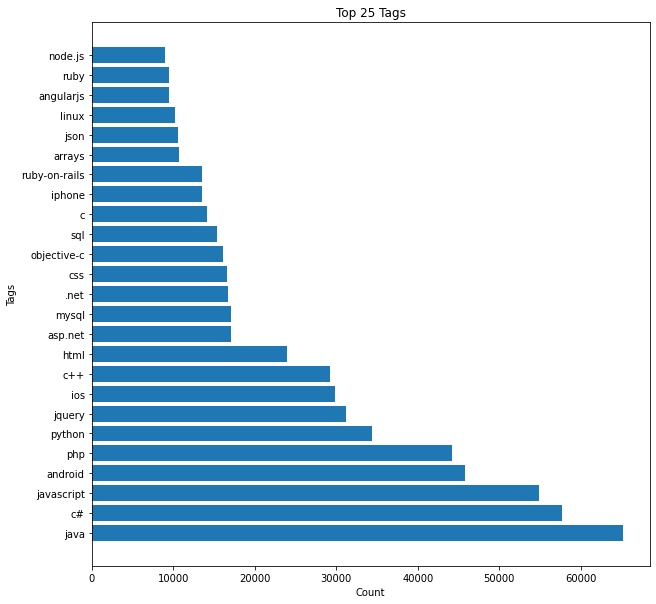

In [38]:
plt.barh(list (tags['tag'])[:25], list (tags['count'])[:25])
plt.ylabel('Tags')
plt.xlabel('Count')
plt.title('Top 25 Tags')


**Java seems to be the top tags assigned to questions**

In [19]:
df1['g'] = df1.groupby('Id').cumcount()
tags_grouped['g'] = tags_grouped.groupby('Id').cumcount()

In [20]:
mergedData=df1.merge(tags_grouped, on='Id',how='outer')

In [21]:
merged_table = pd.merge(df1,tags_grouped,on=["Id", 'g'],how='outer')

In [22]:
merged_table.head(2).drop(columns="g",axis=1)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"flex,actionscript-3,air"
1,90,58.0,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging"


**Popular tag in Datascience List**

In [24]:
Datascience_list=['python', 'r', 'matlab', 'sas', 'excel', 'sql']
for i in Datascience_list :
  x = []
  y = []
  for tag in Datascience_list:
    index = list (tags['tag']).index(tag)
    x.append(tag)
    y.append(list (tags['count'])[index])
  


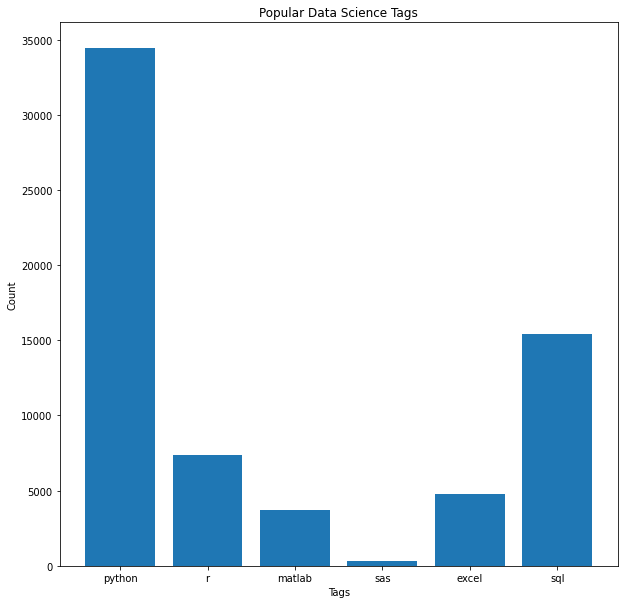

In [36]:
plt.bar(x, y)
plt.ylabel('Count')
plt.xlabel('Tags')
plt.title('Popular Data Science Tags')
plt.show()

**Python seems to be most frequent and second is SQL in Datascience Tags**